In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./renfe.csv')

In [3]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


# Let's Drop all the Unwanted Columns first

### The Columns "insert_date" and "Unnamed: 0" are not useful as:
#### 1. We don't need to "insert_date" to be analysed as it was feed in when the specific Data was inserted by the Scraper
#### 2. We also don't need "Unnamed: 0" as it is a false index column

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.drop(['insert_date'], axis=1, inplace=True)

In [6]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


### Now let's deal with NaN (Not a Number) values in the Dataframe
#### First, let's check the number of NaN values in the Dataset

In [7]:
df.isna().sum()

origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

#### As seen from above output, there are a total of 310,681 NaN values in "price" column and 9664 NaN values in both "train_class" and "fare" columns.
#### We now have 2 choices: Either to drop the rows having any NaN value or to replace NaN values by mean of the whole column
#### We will do both of them:
Let's do the mean method and then drop the values which are hard to take mean of.

In [8]:
# First we make a Copy of the Dataframe and proceed on it, so don't have to reimport the Dataset, should we mess up.
df_copy = df.copy(deep=True)
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [9]:
# Now let's do this column wise
df_copy.price = df_copy.price.fillna((df.price.mean()))
df_copy.head()
# As you can see there don't seem be any NaN values in "price" column

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo
1,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo
2,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo
3,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo
4,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo


2. This was very convinient as the values in "price" column were Numerical. But the values in "train_class" and "fare" are categorical. So we are going to Drop them, now since there are only 9664 values; dropping them won't be that of a bummer!

In [10]:
df_copy.dropna(inplace=True)
# The option, 'inplace=True' will reassign it to the dataframe, so we don't have to do it manually

# Now let's find out all the NaN values in the dataset (hint hint: there aren't!)
df_copy.isna().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

As you can see, all the NaN values are dropped from the Dataset

### Now let's Plot our Data one by one

#### First, we shall plot the 'origins' column in a bar plot to see which city tops the list!

Text(0,0.5,'Number of Trains')

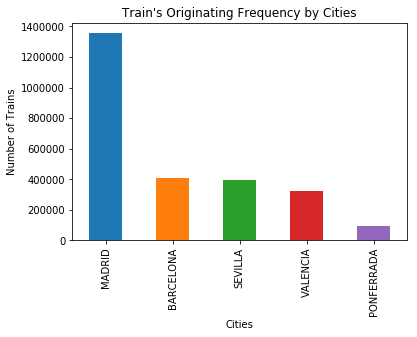

In [11]:
df_copy.origin.value_counts().plot(kind='bar')
plt.title("Train's Originating Frequency by Cities")
plt.xlabel("Cities")
plt.ylabel("Number of Trains")

#### As you can see from above, Most number of trains originate from Madrid, Barcelona, Sevilla, Valencia and at the end Ponferrada

#### Now let's Plot Train's Destination Frequency by Cities 

Text(0,0.5,'Number of Trains')

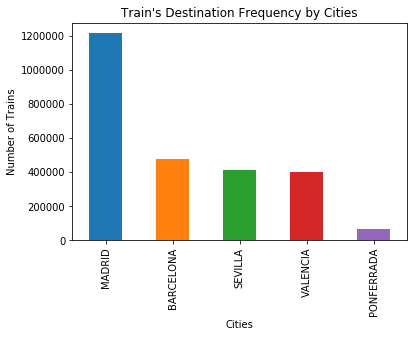

In [12]:
df_copy.destination.value_counts().plot(kind='bar')
plt.title("Train's Destination Frequency by Cities")
plt.xlabel("Cities")
plt.ylabel("Number of Trains")

#### The Above 2 Graphs indicate that Madrid is both the Destination and Origination spot for the majority of Trains.
#### Infact, the Trains Arriving and Originating Distribution of the Trains are identical, which tell you a lot about the Data

### Now let's Clean the Data a bit.
#### We will first encode the categorical values 

In [13]:
# First, let's get the different Destinations
df_copy.destination.value_counts()

# And, now let's get all the names:

# We will make the 'df.destination.value_counts()' as a dictionary object
dest_info = dict(df_copy.destination.value_counts())

# Now let's access all the keys (which are just the city names) using *.keys() function on the dictionary object we just created
city_names = list(dest_info.keys())
print(city_names)

['PONFERRADA', 'MADRID', 'VALENCIA', 'BARCELONA', 'SEVILLA']


In [14]:
# Now let's replace origin and destination by making a simple function
def replace_small_categorical_data(df, column_name, city_names):
    copy_frame = df.copy(deep=True)
    
    copy_frame[column_name].replace(city_names, [x for x in range(len(city_names))], inplace=True)
    
    return copy_frame

In [15]:
# I have thus tested my custom function on the 'destination' column and they work just fine!

new_df_test = replace_small_categorical_data(df_copy, column_name='destination', city_names=city_names)
new_df_test.sample(10)

,origin,destination,start_date,end_date,train_type,price,train_class,fare
2084017,BARCELONA,1,2019-04-17 07:05:00,2019-04-17 09:50:00,AVE,80.15,Turista Plus,Promo
1270549,BARCELONA,1,2019-06-01 07:05:00,2019-06-01 09:50:00,AVE,75.40,Turista,Promo
1520801,MADRID,3,2019-05-19 20:30:00,2019-05-19 23:40:00,AVE,112.55,Preferente,Promo
1381419,VALENCIA,1,2019-05-18 09:40:00,2019-05-18 11:20:00,AVE,57.75,Turista,Promo
330616,MADRID,4,2019-05-21 08:00:00,2019-05-21 10:32:00,AVE,53.40,Turista,Promo
1001797,VALENCIA,1,2019-05-04 20:15:00,2019-05-04 21:55:00,AVE,58.95,Preferente,Promo
363073,VALENCIA,1,2019-06-12 14:50:00,2019-06-12 22:30:00,REGIONAL,28.35,Turista,Adulto ida
1987250,MADRID,4,2019-05-16 16:30:00,2019-05-16 18:51:00,AVE,76.30,Turista,Flexible
2342059,MADRID,4,2019-05-26 21:25:00,2019-05-27 00:10:00,AV City,43.55,Turista,Promo
406967,MADRID,4,2019-05-11 16:00:00,2019-05-11 18:30:00,AVE,61.45,Preferente,Promo


#### As you can see above, the 'destination' column is converted into numerical column from a categorical one.
#### Let's do the same for 'origin' column

In [16]:
# We will insert our new 'new_df_test' dataframe as it has the 'destination' column encoded
new_df_test = replace_small_categorical_data(new_df_test, column_name='origin', city_names=city_names)

In [17]:
# Let's look at the results;
new_df_test.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,1,4,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.550000,Turista,Promo
1,1,4,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.400000,Turista,Promo
2,1,4,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.300000,Turista,Promo
3,1,4,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.400000,Preferente,Promo
4,1,4,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,63.385503,Turista,Promo


#### Now that out of the way, let's deal with remaining categorical columns, i.e: 'train_type', 'train_class' and 'fare'

In [28]:
# First, let's make a function to get all the different category names;
def get_category_names(df, column_name):
    '''
    Column passed must be categorical
    '''
    unique_names_dict = dict(df[column_name].value_counts())
    unique_names = list(unique_names_dict.keys())
    
    _length = len(unique_names)
    return (_length, unique_names)

In [26]:
unique_names_dict = dict(df['train_type'].value_counts())
len(list(unique_names_dict.keys()))

16

### Now we are ready to convert the 3 remaining columns into numerical but first let's look how there distribution looks like


Text(0,0.5,'Number of trains')

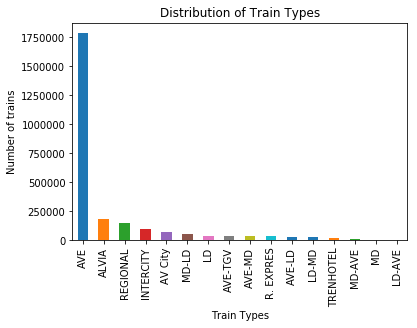

In [34]:
new_df_test.train_type.value_counts().plot(kind='bar')
plt.title('Distribution of Train Types')
plt.xlabel('Train Types')
plt.ylabel('Number of trains')

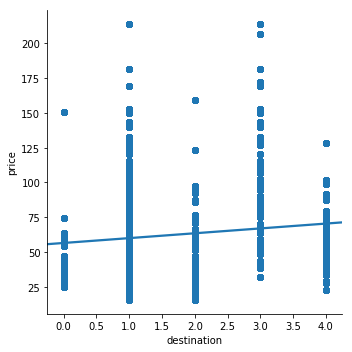

In [37]:
sns.lmplot(x='destination', y='price', data=new_df_test)